In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.axes

In [30]:
loan=pd.read_csv('loan.csv')
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [3]:
loan.shape

(367, 12)

In [4]:
loan.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [6]:
loan.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,367,356,367,357,367,344,367.000000,367.000000,362.000000,361.000000,338.000000,367
unique,367,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3
top,LP001015,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Urban
freq,1,286,233,200,283,307,NaN,NaN,NaN,NaN,NaN,140
mean,NaN,NaN,NaN,NaN,NaN,NaN,4805.599455,1569.577657,136.132597,342.537396,0.825444,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,4910.685399,2334.232099,61.366652,65.156643,0.380150,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,28.000000,6.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2864.000000,0.000000,100.250000,360.000000,1.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3786.000000,1025.000000,125.000000,360.000000,1.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5060.000000,2430.500000,158.000000,360.000000,1.000000,NaN


In [7]:
loan['Credit_History'].fillna(loan['Credit_History'].mode()[0],inplace=True)

In [13]:
loan['Credit_History'].mode()

0    1.0
Name: Credit_History, dtype: float64

In [8]:
loan.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History        0
Property_Area         0
dtype: int64

In [9]:
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [10]:
# #impute by median
# impute_by_median=fifa.loc[:,['Weak Foot','Skill Moves']]
# for i in impute_by_median.columns:
#     fifa[i].fillna(fifa[i].median(),inplace=True)

NameError: name 'fifa' is not defined

In [14]:
loan['Credit_History'].value_counts()

1.0    308
0.0     59
Name: Credit_History, dtype: int64

In [17]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [25]:
loan['Credit_History'].value_counts().reset_index()

,index,Credit_History
0,1.0,308
1,0.0,59


<AxesSubplot:>

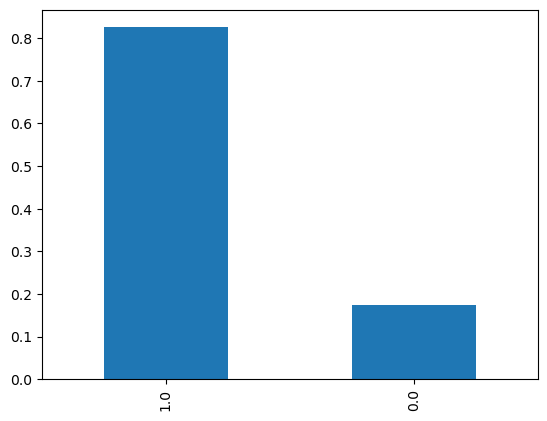

In [32]:
loan['Credit_History'].value_counts(normalize=True).plot.bar()

In [33]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

<AxesSubplot:title={'center':'credit history'}>

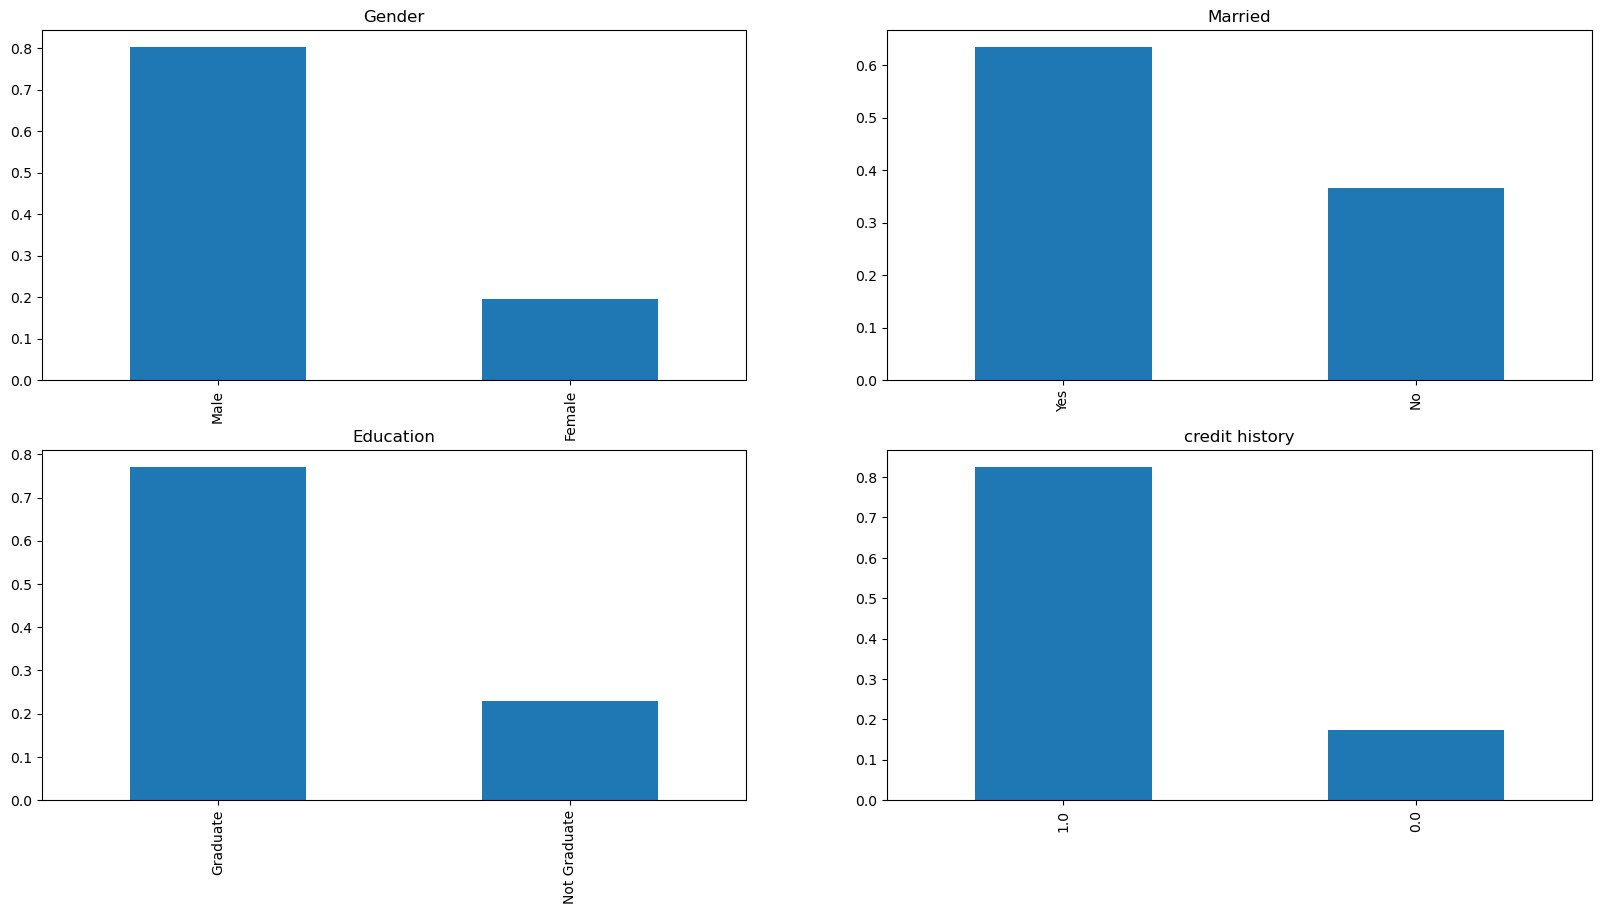

In [56]:
plt.subplots(figsize=(20,10))
plt.subplot(221)
loan['Gender'].value_counts(normalize=True).plot.bar()
plt.title('Gender')
plt.subplot(222)
loan['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(223)
loan['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.subplot(224)
loan['Credit_History'].value_counts(normalize=True).plot.bar(title='credit history')

<AxesSubplot:title={'center':'Property_Area'}>

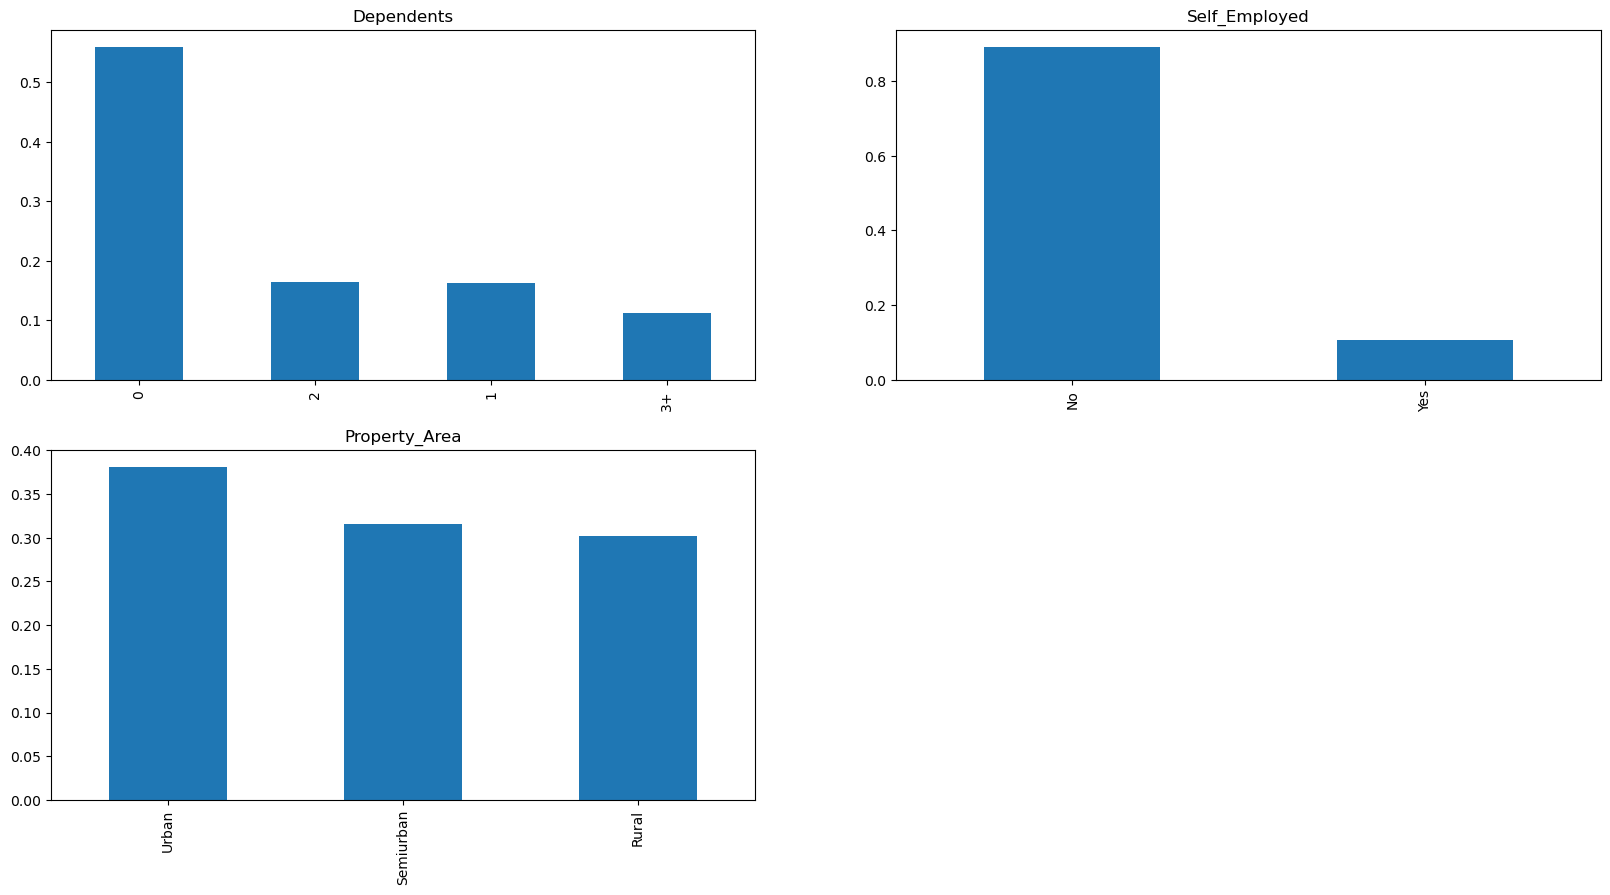

In [61]:
plt.subplots(figsize=(20,10))
plt.subplot(221)
loan['Dependents'].value_counts(normalize=True).plot.bar()
plt.title('Dependents')
plt.subplot(222)
loan['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.subplot(223)
loan['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


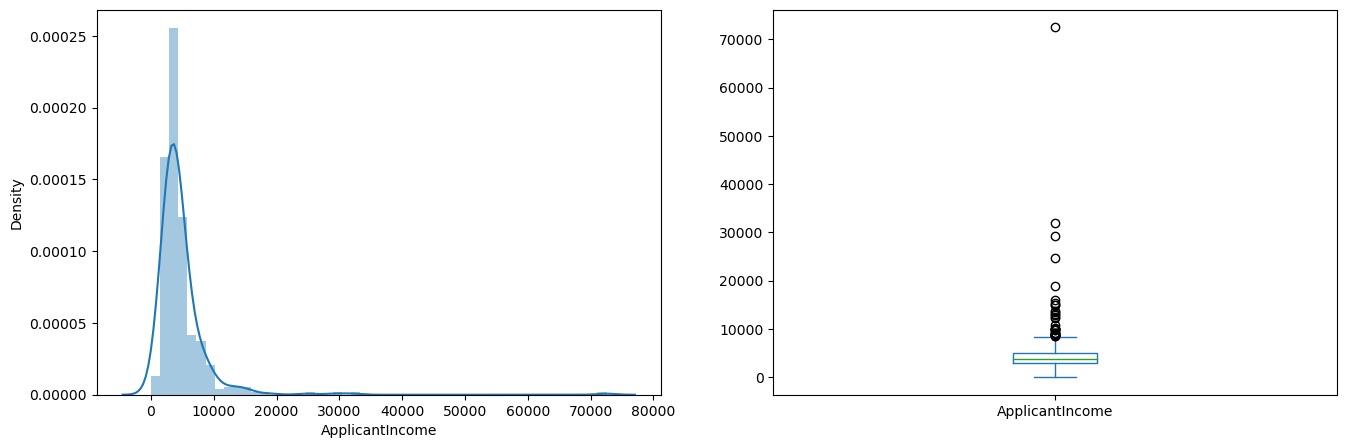

In [62]:
plt.figure(1)
plt.subplot(121)
sns.distplot(loan['ApplicantIncome'])
plt.subplot(122)
loan['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

Text(0.5, 0.98, '')

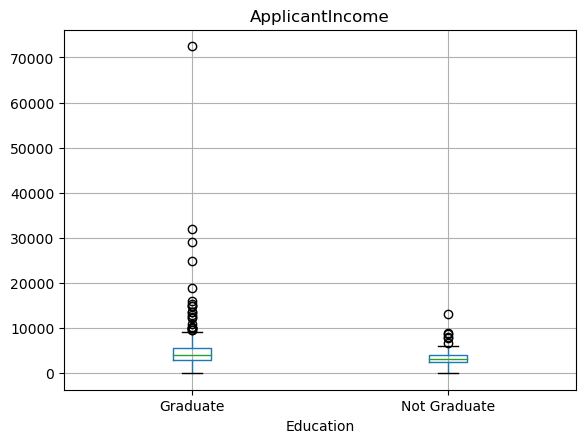

In [65]:
loan.boxplot(column=['ApplicantIncome'],by='Education')
plt.suptitle('')

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


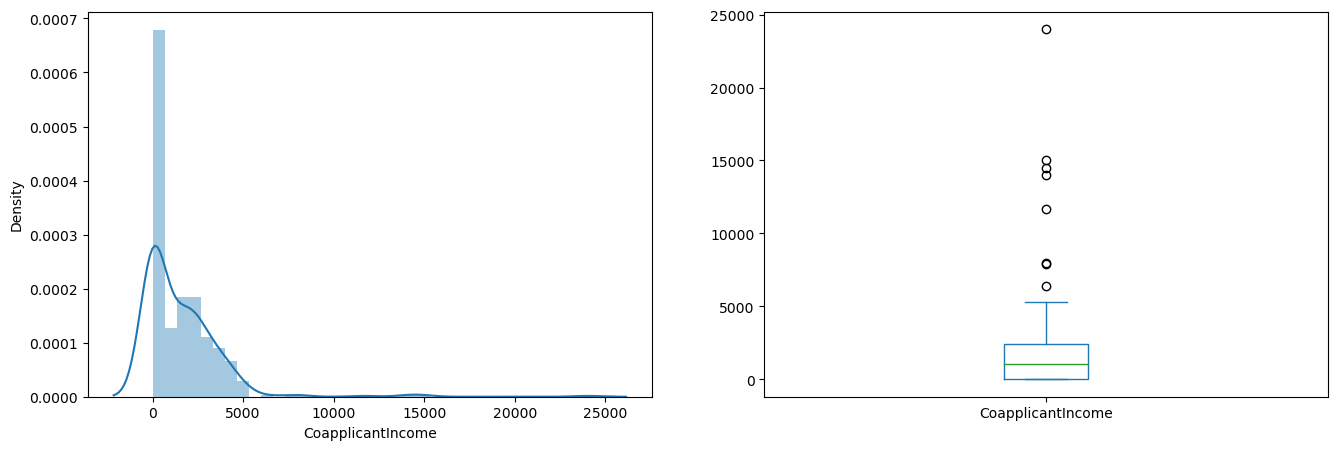

In [66]:
plt.figure(1)
plt.subplot(121)
sns.distplot(loan['CoapplicantIncome'])
plt.subplot(122)
loan['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


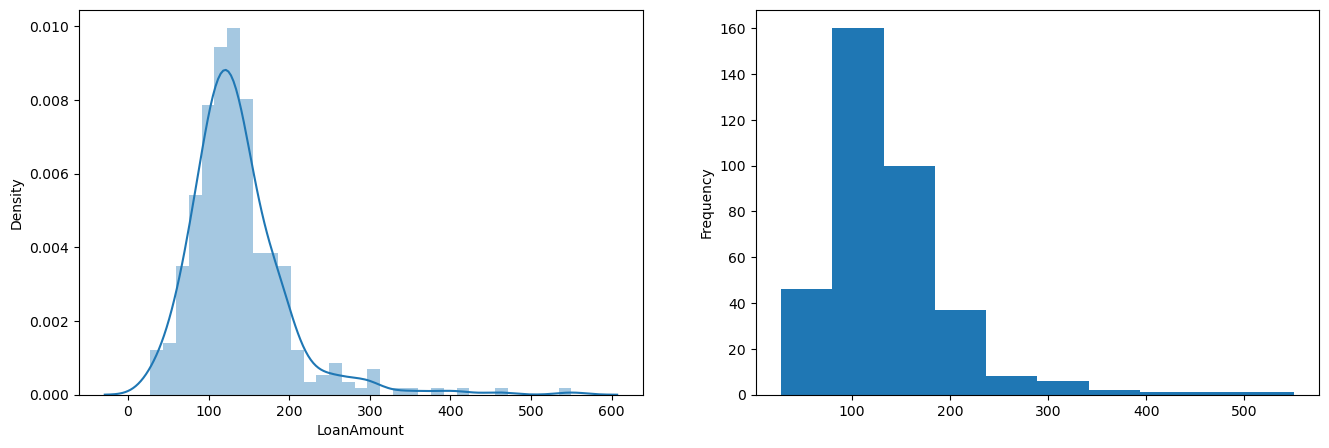

In [71]:
plt.figure(1)
plt.subplot(121)
sns.distplot(loan['LoanAmount'])
plt.subplot(122)
loan['LoanAmount'].plot.hist(figsize=(16,5))
plt.show()

In [78]:
gender=pd.crosstab(loan['Gender'],loan['Loan_Amount_Term'])

In [79]:
gender

Loan_Amount_Term,6.0,12.0,36.0,60.0,84.0,120.0,180.0,240.0,300.0,350.0,360.0,480.0
Gender,,,,,,,,,,,,
Female,0,0,0,0,1,0,3,0,3,0,60,3
Male,1,1,1,1,2,1,18,4,4,1,241,5


<AxesSubplot:xlabel='Gender'>

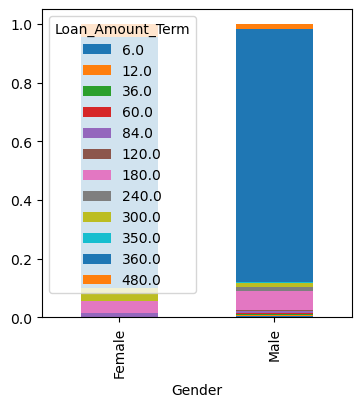

In [83]:
gender.div(gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

<AxesSubplot:xlabel='Married'>

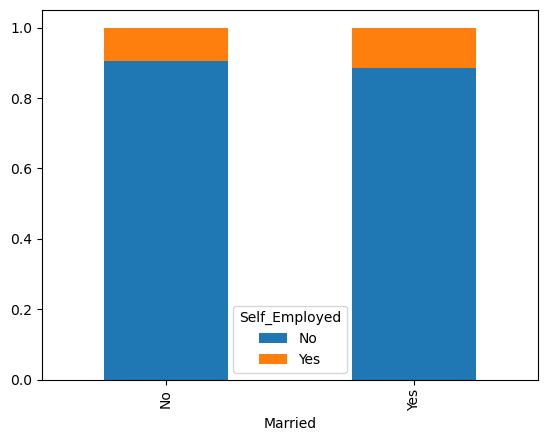

In [84]:
Married=pd.crosstab(loan['Married'],loan['Self_Employed'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

In [93]:
loan['ApplicantIncome'].max()

72529

<AxesSubplot:xlabel='income_bin'>

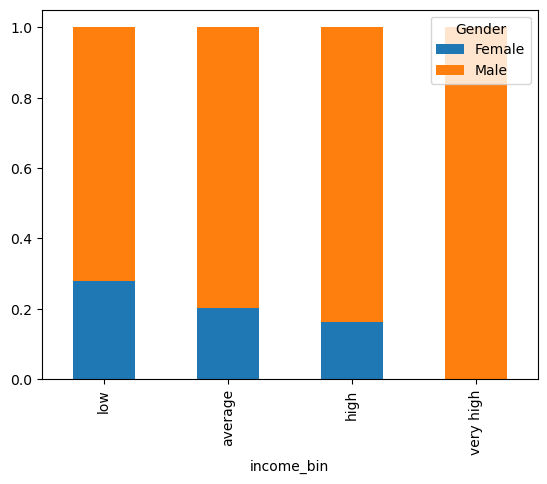

In [102]:
bins=[0,2500,4000,16000,80000]
groups=['low','average','high','very high']
loan['income_bin']=pd.cut(loan['ApplicantIncome'],bins,labels=groups)
income_bin=pd.crosstab(loan['income_bin'],loan['Gender'])
income_bin.div(income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)


In [98]:
loan['income_bin']

0         high
1      average
2         high
3          low
4      average
        ...   
362       high
363       high
364    average
365       high
366       high
Name: income_bin, Length: 367, dtype: category
Categories (4, object): ['low' < 'average' < 'high' < 'very high']

In [97]:
loan['CoapplicantIncome'].max()

24000

In [114]:
bins=[0,1000,5000,10000,24000]
groups=['low','average','high','very high']
loan['coapplicant_income_bin']=pd.cut(loan['ApplicantIncome'],bins,labels=groups)

<AxesSubplot:xlabel='coapplicant_income_bin'>

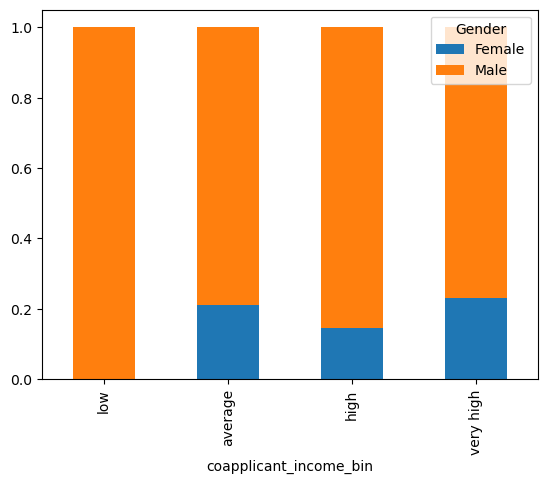

In [122]:
CoapplicantIncome=pd.crosstab(loan['coapplicant_income_bin'],loan['Gender'])
CoapplicantIncome.div(CoapplicantIncome.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

<AxesSubplot:xlabel='total_income_bin'>

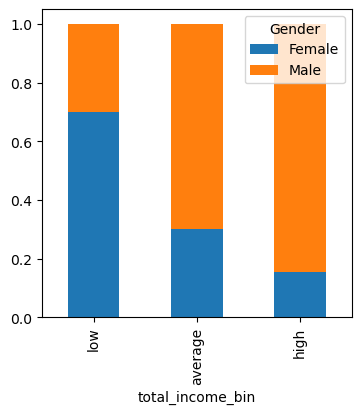

In [130]:
bins=[0,2500,4000,81000]
groups=['low','average','high']
loan['totalincome']=loan['ApplicantIncome']+loan['CoapplicantIncome']
loan['total_income_bin']=pd.cut(loan['totalincome'],bins,labels=groups)
totalincome=pd.crosstab(loan['total_income_bin'],loan['Gender'])
totalincome.div(totalincome.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))


In [126]:
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,income_bin,coapplicant,totalincome,coapplicant_income_bin,total_income_bin
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,high,high,5720,high,high
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,average,average,4576,average,high
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,high,average,6800,average,high
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,low,average,4886,average,high
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,average,average,3276,average,average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,high,average,5786,average,high
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,high,average,4867,average,high
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban,average,average,5243,average,high
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,high,average,7393,average,high


In [131]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'income_bin',
       'coapplicant', 'totalincome', 'coapplicant_income_bin',
       'total_income_bin'],
      dtype='object')

In [134]:
loan=loan.drop(['income_bin','coapplicant','totalincome','coapplicant_income_bin','total_income_bin'],axis=1)
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [135]:
loan['Dependents'].value_countsounts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [139]:
loan['Dependents'].replace('3+',3,inplace=True)
loan.Dependents.value_counts()

0    200
2     59
1     58
3     40
Name: Dependents, dtype: int64

<AxesSubplot:>

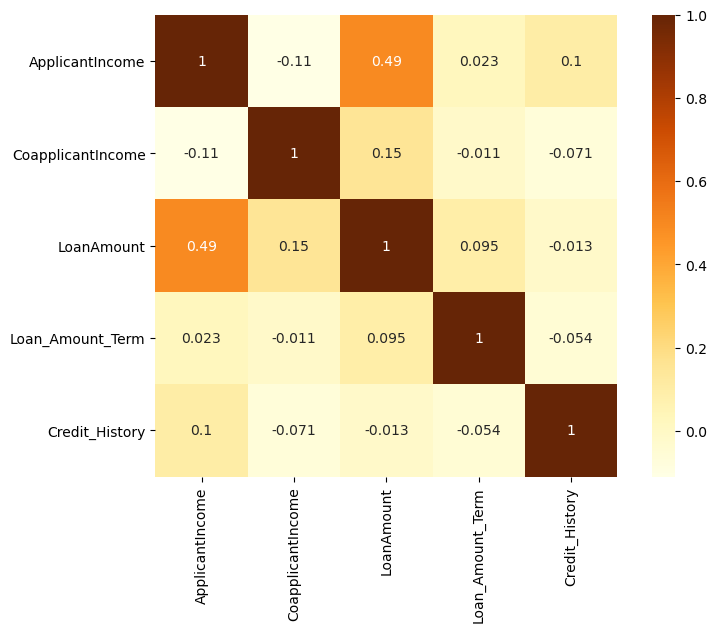

In [150]:
matrix=loan.corr()
f,ax=plt.subplots(figsize=(9,6))
sns.heatmap(matrix,annot=True,square=True,vmax=1,cmap='YlOrBr')

In [151]:
loan.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [155]:
loan['Gender'].fillna(loan['Gender'].mode,inplace=True)
loan['Dependents'].fillna(loan['Dependents'].mode,inplace=True)
loan['Self_Employed'].fillna(loan['Self_Employed'].mode,inplace=True)
loan['Credit_History'].fillna(loan['Credit_History'].mode,inplace=True)
loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].mode,inplace=True)
loan['LoanAmount'].fillna(loan['LoanAmount'].median,inplace=True)

loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64